In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [67]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("nyc-rolling-sales.csv")

In [68]:
#menampilkan sebagian isi dari table
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [69]:
#menampilkan info dari tabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Preprocessing

In [70]:
# Data Type Conversion
df["SALE PRICE"] = pd.to_numeric(df["SALE PRICE"], errors="coerce")
df["LAND SQUARE FEET"] = pd.to_numeric(df["LAND SQUARE FEET"], errors="coerce")
df["GROSS SQUARE FEET"] = pd.to_numeric(df["GROSS SQUARE FEET"], errors="coerce")

In [101]:
# Filter Dataset for properties built between 1900 and those built from 2001 onwards
properties_before_2000 = df[(df["YEAR BUILT"] >= 1900) & (df["YEAR BUILT"] <= 2000)]
properties_after_2000 = df[df["YEAR BUILT"] > 2000]

# Measure of Central Tendency

In [102]:
# Mean
mean_harga = int(df["SALE PRICE"].mean())

In [103]:
mean_harga

1276456

In [104]:
# Median
median_harga = int(df["SALE PRICE"].median())

In [105]:
median_harga

530000

In [106]:
# Modus
modus_harga = int(df["SALE PRICE"].mode().iloc[0])

In [107]:
modus_harga

0

In [108]:
harga_null = df[df["SALE PRICE"].isnull()]

In [109]:
harga_null

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84524,8390,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,28,,B9,51 CLAY PIT ROAD,...,2,0,2,2986.0,1820.0,1999,1,B9,NaN,2017-07-06 00:00:00
84525,8391,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,188,,B9,1576 WOODROW ROAD,...,2,0,2,2490.0,1530.0,1998,1,B9,NaN,2016-10-14 00:00:00
84538,8404,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,,B2,178 DARNELL LANE,...,2,0,2,3215.0,1300.0,1995,1,B2,NaN,2017-06-30 00:00:00
84539,8405,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,,B2,137 DARNELL LANE,...,2,0,2,3016.0,1300.0,1995,1,B2,NaN,2016-12-30 00:00:00


In [110]:
harga_null.count()

Unnamed: 0                        14561
BOROUGH                           14561
NEIGHBORHOOD                      14561
BUILDING CLASS CATEGORY           14561
TAX CLASS AT PRESENT              14561
BLOCK                             14561
LOT                               14561
EASE-MENT                         14561
BUILDING CLASS AT PRESENT         14561
ADDRESS                           14561
APARTMENT NUMBER                  14561
ZIP CODE                          14561
RESIDENTIAL UNITS                 14561
COMMERCIAL UNITS                  14561
TOTAL UNITS                       14561
LAND SQUARE FEET                   9497
GROSS SQUARE FEET                  8688
YEAR BUILT                        14561
TAX CLASS AT TIME OF SALE         14561
BUILDING CLASS AT TIME OF SALE    14561
SALE PRICE                            0
SALE DATE                         14561
dtype: int64

Pada data tersebut masih banyak yang bernilai null

# Measure of Spread

In [111]:
# Range
range_harga = int(df["SALE PRICE"].max() - df["SALE PRICE"].min())

In [112]:
range_harga

2210000000

In [113]:
# Variance
variance_harga = int(df["SALE PRICE"].var())

In [114]:
variance_harga

130079849507240

In [115]:
# Standar Deviation
std_dev_harga = int(df["SALE PRICE"].std())

In [116]:
std_dev_harga

11405255

# Probability Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

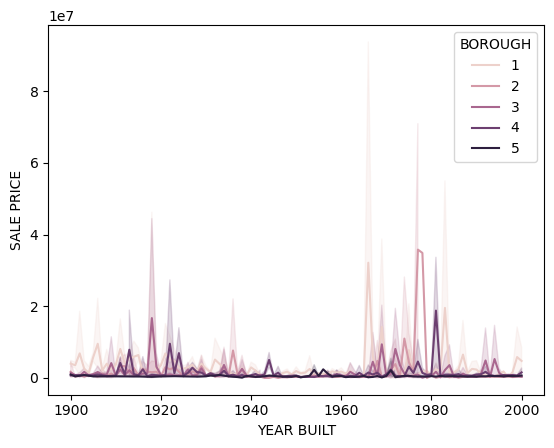

In [119]:
# Analyze distribution and creating data
sns.lineplot(data = properties_before_2000,
            x = "YEAR BUILT",
            y = "SALE PRICE",
            hue = "BOROUGH")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

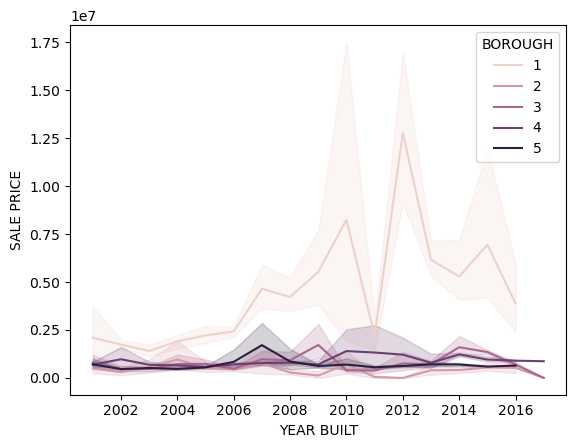

In [120]:
# Analyze distribution and creating data
sns.lineplot(data = properties_after_2000,
            x = "YEAR BUILT",
            y = "SALE PRICE",
            hue = "BOROUGH")
plt.show

# Confidence Intervals

In [123]:
# Calculate Confidence Intervals for the mean sale price
confidence_level = 0.95
sample_size = len(df["SALE PRICE"])
standard_error = std_dev_harga / np.sqrt(sample_size)
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=sample_size -1) * standard_error
confidence_interval = (mean_harga - margin_of_error, mean_harga + margin_of_error)

In [124]:
confidence_interval

(1199577.015383074, 1353334.984616926)

# Hypothesis Testing

In [126]:
# Hypothesis Testing
# Formulate and test the hypothesis about the mean sale price
# Null Hypothesis (H0): The mean sale price is equal to a specific value
# Alternative Hypothesis (H1): The mean sale price is not equal to that specific value

# Replace with your specific hypothesis and test
h0_mean = 1000000
t_stat, p_value = stats.ttest_1samp(df['SALE PRICE'], h0_mean)

In [127]:
# Measure of Central Tendency: Mean for Unit Sales
mean_units_before_2000 = properties_before_2000['TOTAL UNITS'].mean()
mean_units_after_2000 = properties_after_2000['TOTAL UNITS'].mean()

# Conclusion

In [128]:
alpha = 0.05
if p_value < alpha:
    hypothesis_result = "Reject the null hypothesis"
else:
    hypothesis_result = "Fail to reject the null hypothesis"

print(hypothesis_result)

Fail to reject the null hypothesis


# Display Result

In [129]:
print("Units Sold for Properties Built 1900-2000:")
print(f"Mean: {mean_units_before_2000:.2f}")

print("\nUnits Sold for Properties Built 2001 onwards:")
print(f"Mean: {mean_units_after_2000:.2f}")

print("\nHypothesis Test Result:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Units Sold for Properties Built 1900-2000:
Mean: 2.43

Units Sold for Properties Built 2001 onwards:
Mean: 2.20

Hypothesis Test Result:
T-statistic: nan
P-value: nan
